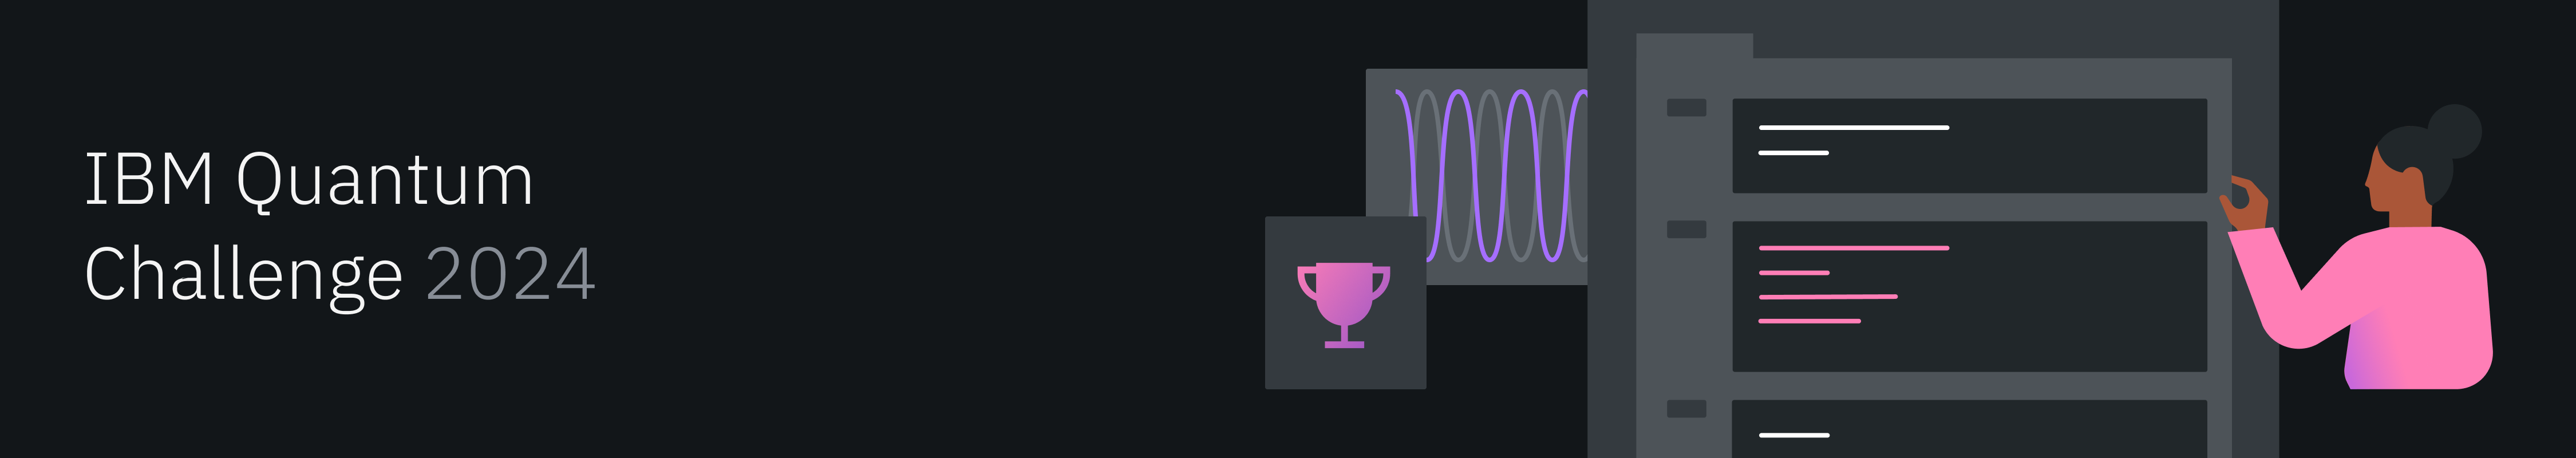

# Laboratorio 1: Introducci√≥n a Qiskit 1.0

# Tabla de contenido
- **[Introducci√≥n](##Introducci√≥n)**
- **[Parte I: estados Qiskit, lo nuevo y lo antiguo](#Parte-I:-Qiskit-states,-lo-nuevo-y-lo-antiguo)**
    - **[Ejercicio 1: Crear y dibujar un circuito de estado Bell](#Ejercicio1)**
    - **[Ejercicio 2: Utilizar Sampler.run](#Ejercicio2)**
    - **[Ejercicio 3: Crear y dibujar un circuito de estado W](#Ejercicio2)**    
- **[Parte II: VQE con Qiskit 1.0](#Part-II:-VQE-with-Qiskit-1.0)**
    - **[Ejercicio 4: Crear a parametrizar un circuito como ansatz](#Ejercicio4)**    
    - **[Ejercicio 5: Transpilar a circuitos ISA](#Ejercicio5)**  
    - **[Ejercicio 6: Definiendo la funci√≥n de costes](#Ejercicio6)**  
    - **[Ejercicio 7: QiskitRuntimeService V2 primitivas, modo de testeo local y sesiones, una primera vista](#Ejercicio7)**


## Configuraci√≥n

In [1]:
### Instale Qiskit, si es necesario

%pip install qiskit[visualization]==1.0.2
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-3fjebxhh
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-3fjebxhh
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 4db06c25729efb615e1e800e2d83eab0e9291486
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.7/134.7 kB 4.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
### Guarde el token API

%set_env QXToken=75ca6ccd927a9d552250529f61ec06dffeae395f602a2ebb81e35178de034aadd046b96922df5af7bfc2093540d47bbfc845c1a8403395f2040c7ced66282ee0

# Aseg√∫rese de que no haya espacio entre el signo igual
# y el comienzo de su token

env: QXToken=75ca6ccd927a9d552250529f61ec06dffeae395f602a2ebb81e35178de034aadd046b96922df5af7bfc2093540d47bbfc845c1a8403395f2040c7ced66282ee0


In [3]:
# Importaciones

import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [4]:
# Configure el grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

## Introducci√≥n

Bienvenid@s a nuestro primer desaf√≠o! El primer desaf√≠o est√° dise√±ado para introducir las nuevas capacidades y funciones de Qiskit 1.0. 

Los siguientes desaf√≠os tendr√°n un √©nfasis m√°s profundo en estas capacidades e introducir√°n conceptos m√°s complejos.
Durante este desaf√≠o reaprender√°n como dise√±ar circuitos cu√°nticos con Qiskit y como implementar algoritmos de optimizaci√≥n utilizando un VQE (Variational Quantum Eigensolver).
Estos dos objetivos se llevar√°n a cabo en dos secciones:

1) Estados cu√°nticos con Qiskit, lo nuevo y lo antiguo
2) VQE con Qiskit 1.0

¬°Empecemos!

## Parte I: Estados cu√°nticos con Qiskit, lo nuevo y lo antiguo

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 1: Crear y dibujar un circuito de estado Bell</b> 

Los circuitos Bell son circuitos espec√≠ficos que generan estados de Bell, o pares EPR, una tipo de vectores de base entrelazados y normalizados. En otras palabras, son los circuitos que utilizamos para generar estados entrelazados, un ingrediente clave en las recetas cu√°nticas.

Existen 4 estados de Bell. Puede aprender sobre cada uno en la [p√°gina conceptos b√°sicos de informaci√≥n cu√°ntica](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)


**Su tarea:** Construya un circuito que genere el estado Bell $| \psi ^- \rangle$.
    
</div>

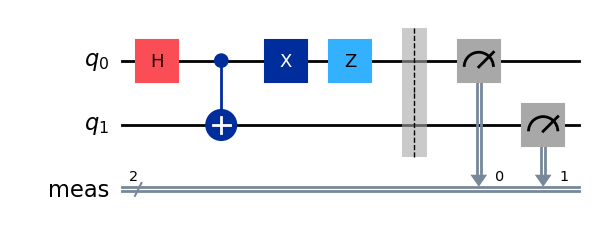

In [5]:
# Construya un circuito para formar un estado Bell psi-menos
# Aplique las puertas al circuito proporcionado, qc

qc = QuantumCircuit(2)

### A√±ada su c√≥digo aqu√≠ ###
#Aplicamos una compuerta Hadamar
qc.h(0)
#Aplicamos una compuerta cx
qc.cx(0,1)
#Aplicamo la compuerta Z al primer qubit
qc.x(0)
qc.z(0)

### No cambie el programa m√°s all√° de esta l√≠nea ###
qc.measure_all()
qc.draw('mpl')

<div class="alert alert-block alert-warning">

**Pista:** El estado $| \psi ^- \rangle$ utiliza una sola puerta Z y una sola puerta X, las cuales ocurren despu√©s del CNOT.

</div>

In [6]:
# Env√≠e su respuesta usando el siguiente c√≥digo

grade_lab1_ex1(qc) # Tipo de resultado esperado: QuantumCircuit

Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


Para observar el estado entrelazado resultante que produce este circuito, ejecutaremos nuestro circuito varias veces y recopilaremos estad√≠sticas sobre las medidas finales del c√∫bit. Ese es el objetivo del pr√≥ximo ejercicio.

<a id="exercise2"></a>
<a name="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 2: Utilizar Sampler.run</b> 
    
La primitiva [Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) ([m√°s informaci√≥n sobre Primitivas aqu√≠](https://docs.quantum.ibm.com/run/primitives-get-started)) resulta en el tipo de salida especificada. Esto nos permite muestrear de manera eficiente estados cu√°nticos ejecutando circuitos cu√°nticos y proporcionando distribuciones de probabilidad de los estados cu√°nticos.

**Su tarea:** Utilize Qiskit StatevectorSampler para obtener las cuentas resultantes de nuestro circuito.
    
</div>

In [7]:
qc.measure_all()

### A√±ada su c√≥digo aqu√≠ ###

# Instantiate a new statevector simulation based sampler object.
sampler = StatevectorSampler()
 
# Start a job that will return shots for all 100 parameter value sets.
pub = (qc)
job_sampler = sampler.run([pub], shots=256)
 

### No cambie el programa m√°s all√° de esta l√≠nea ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 132, '10': 124}


In [8]:
# Env√≠e su respuesta usando el siguiente c√≥digo

grade_lab1_ex2(job_sampler) # Tipo de resultado esperado: PrimitiveJob

Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


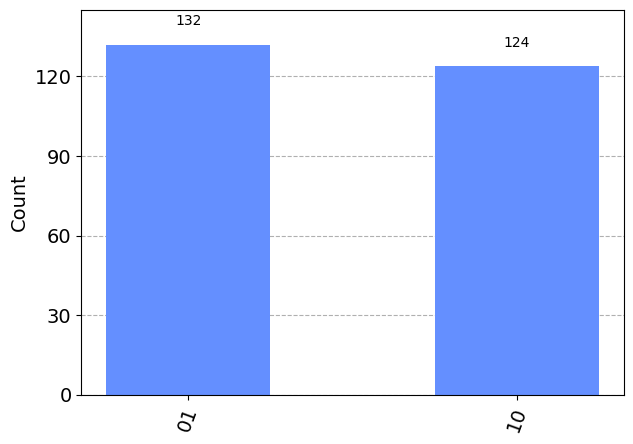

In [9]:
plot_histogram(counts_sampler)

El histograma muestra una probabilidad aproximadamente uniforme de encontrar nuestros c√∫bits en los estados `01` y `10`, lo que sugiere que el entrelazamiento se realiz√≥ como esperabamos.

<a id="exercise3"></a>
<a name="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 3: Crear y dibujar un circuito de estado W</b> 
      
A continuaci√≥n, desarrollaremos un circuito un poco m√°s complicado. De manera similar al circuito Bell que produce estados Bell, los circuitos W producen estados W. Aunque los estados Bell entrelazan dos c√∫bits, los estados W entrelazan tres c√∫bits.
Para construir nuestro estado W, seguiremos 6 sencillos pasos:

1. Inicialice un circuito de 3 c√∫bits
2. Realice una rotaci√≥n Ry en nuestro c√∫bit. Los detalles de esta operaci√≥n son proporcionados.
3. Agregue una puerta hadamard controlada en el c√∫bit 1, con el c√∫bit de control 0
4. Agregue una puerta CNOT con el c√∫bit de control 1 y el c√∫bit de destino 2
5. Agregue una puerta CNOT con c√∫bit de control 0 y c√∫bit de destino 1
6. Agregue una puerta X en el c√∫bit 0

**Su tarea:** Sigua los pasos para construir el circuito del estado W.

</div>

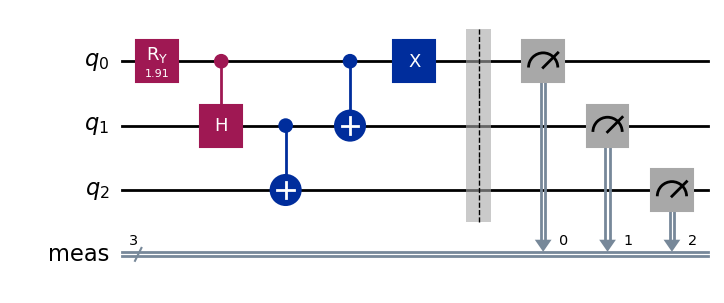

In [10]:
# Paso 1
qc = QuantumCircuit(3) #A√±ada su c√≥digo aqu√≠

# Paso 2 
qc.ry(1.91063324, 0)

# Paso 3
qc.ch(0,1)

# Paso 4
qc.cx(1,2)

#Paso 5
qc.cx(0,1)

#Paso 6
qc.x(0)




### No cambie el programa m√°s all√° de esta l√≠nea ###
qc.measure_all()
qc.draw('mpl')

In [11]:
# Env√≠e su respuesta usando el siguiente c√≥digo

grade_lab1_ex3(qc) # Tipo de resultado esperado: QuantumCircuit

Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


Una vez m√°s, visualicemos nuestros resultados:

In [12]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3246, '001': 3329, '010': 3425}


In [13]:
plot_histogram(counts_sampler)

Observamos nuestros recuentos totales distribuidos en tres contenedores de tama√±o similar en tres estados, que son los tres estados deseados para la creaci√≥n exitosa de un estado W. ¬°Buen trabajo!

Ahora que tenemos los circuitos b√°sicos, comenzaremos a introducir y desarrollar c√≥digos m√°s complejos con Qiskit 1.0.

## Parte II: VQE con Qiskit 1.0
<a name="pt2"></a>

El n√∫cleo de este desaf√≠o aprovechar√° Qiskit Runtime y un Variational Quantum Eigensolver (VQE). Usaremos Qiskit Runtime Estimator para calcular los resultados esperados y Qiskit Runtime Sessions para facilitar la ejecuci√≥n de un algoritmo VQE. El desaf√≠o se basa en el c√≥digo que el f√≠sico experimental e investigador de IBM Quantum Nick Bronn cre√≥ para la [serie de videos Coding with Qiskit Runtime](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqAC8DnVoLOzg2bKE4C7ARM), espec√≠ficamente en el [Episodio 05 Primitivos y sesiones](https://youtu.be/yxuH8eb4MS4?si=e3trSORNjooWlQXu). Implementaremos este c√≥digo utilizando la versi√≥n m√°s reciente de Qiskit 1.0.

### Empecemos creando un operador Pauli
Un operador de Pauli es una matriz que representa un observable de la mec√°nica cu√°ntica correspondiente a una medida del giro a lo largo de un eje particular (x, y, z). Construyamos uno:

In [14]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ','ZZZ','XIX'])
print(pauli_op.to_matrix())

[[ 4.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -4.+0.j]]


¬°Te invitamos a experimentar con varios operadores Pauli y ver qu√© posibles combinaciones resultantes obtienes!

### Configurar y ejecutar un algoritmo VQE

Ahora comenzaremos a configurar nuestro algoritmo VQE. Los eigensolvers cu√°nticos variacionales (VQE) son algoritmos h√≠bridos que utilizan t√©cnicas cu√°nticas y cl√°sicas para encontrar el estado fundamental de un sistema f√≠sico determinado. Se utilizan a menudo en qu√≠mica cu√°ntica y problemas de optimizaci√≥n, y son candidatos prometedores para algoritmos h√≠bridos en dispositivos ruidosos a corto plazo.

Los VQE se caracterizan por el uso de un algoritmo de optimizaci√≥n cl√°sico para mejorar iterativamente una soluci√≥n de prueba parametrizada, llamada "ansatz". El objetivo es resolver el estado fundamental de un hamiltoniano dado representado como una combinaci√≥n lineal de t√©rminos de Pauli.

La ejecuci√≥n de un algoritmo VQE requiere estos tres pasos:

1. Configuraci√≥n del hamiltoniano y ansatz (especificaci√≥n del problema)
2. Implementaci√≥n del estimador Qiskit Runtime
3. Agregar el optimizador cl√°sico y ejecutar nuestro programa.

Nosotros seguiremos estos pasos.

<a id="exercise4"></a>
<a name="exercise4"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 4: Crear a parametrizar un circuito como ansatz</b> 
    
Nuestra primera tarea ser√° configurar nuestro ansatz, o una soluci√≥n inicial, que utilizaremos como gu√≠a para perfeccionar y/o comparar nuestros resultados.

Para poder llevar esto acabo usaremos el circuito `TwoLocal` de Qiskit. `TwoLocal` es un circuito predise√±ado que puede usarse para preparar funciones de onda de prueba para algoritmos cu√°nticos variacionales o circuitos de clasificaci√≥n para aprendizaje autom√°tico. Los circuitos TwoLocal son circuitos parametrizados que constan de capas de rotaci√≥n alternas y capas de entrelazamiento. Puede encontrar m√°s informaci√≥n sobre ellos en la [documentaci√≥n de Qiskit](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

**Su tarea:** Configure un circuito TwoLocal de 3 c√∫bits usando rotaciones [Ry](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RYGate) y [Rz](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RZGate). El entrelazamiento debe configurarse al m√°ximo y los bloques de entrelazamiento deben usar la puerta Cz. Aseg√∫rese de configurar `reps=1` e `insert_barriers=True`.

</div>

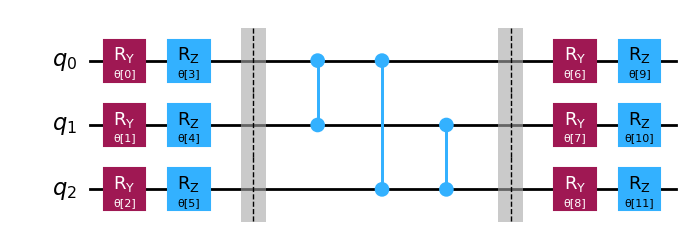

In [15]:
num_c√∫bits = 3#A√±ada su c√≥digo aqu√≠
rotation_blocks = ['ry','rz']  #A√±ada su c√≥digo aqu√≠
entanglement_blocks = 'cz' #A√±ada su c√≥digo aqu√≠
entanglement = 'full' #A√±ada su c√≥digo aqu√≠

ansatz = TwoLocal(num_c√∫bits, rotation_blocks, entanglement_blocks, entanglement, reps=1, insert_barriers=True)#A√±ada su c√≥digo aqu√≠


### No cambie el programa m√°s all√° de esta l√≠nea ###
ansatz.decompose().draw('mpl')

In [16]:
# Env√≠e Su respuesta usando el siguiente c√≥digo

grade_lab1_ex4(num_c√∫bits, rotation_blocks, entanglement_blocks, entanglement) # Tipo de resultado esperado: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


En la figura anterior vemos que nuestro circuito ansatz est√° definido por un vector de par√°metros Œ∏, con un n√∫mero total de par√°metros:

In [17]:
num_params = ansatz.num_parameters
num_params

12

<a id="exercise5"></a>
<a name="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 5: Transpilar a circuitos ISA </b> 
    
En este ejemplo usaremos [FakeSherbrooke](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeSherbrooke), un backend falso (simulado) de 127 c√∫bits, utilizado para probar el transpilador y otras funcionalidades orientadas al backend.

Los administradores de pases preestablecidos son los administradores de pases predeterminados utilizados por la funci√≥n `transpile()`. `transpile()` proporciona un m√©todo conveniente y simple para construir un objeto `PassManager` independiente que refleja lo que hace la funci√≥n transpile al optimizar y transformar un circuito cu√°ntico para su ejecuci√≥n en un backend espec√≠fico.

**Su tarea:** Defina el administrador de pases. Consulte la [documentaci√≥n de Qiskit](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager) para obtener m√°s informaci√≥n.

</div>

In [18]:
backend_answer = FakeSherbrooke() #A√±ada su c√≥digo aqu√≠
optimization_level_answer = 1 #A√±ada su c√≥digo aqu√≠ 
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit =  pm.run(ansatz)#A√±ada su c√≥digo aqu√≠ 

<div class="alert alert-block alert-info">
    
<b>Consejo: ¬°Aseg√∫rate de estar utilizando el backend correcto! </b>

El clasificador fue dise√±ado teniendo en cuenta **FakeSherbrooke** y, por lo tanto, espera un mapa de 127 c√∫bits. Si utiliza otro backend, puede tener problemas.

    
</div>

In [19]:
# Env√≠e su respuesta usando el siguiente c√≥digo

grade_lab1_ex5(isa_circuit) # Tipo de resultado esperado: QuansumCircuit

Submitting your answer. Please wait...


Congratulations üéâ! Your answer is correct and has been submitted.


Con la versi√≥n m√°s reciente de Qiskit Runtime, todos los circuitos enviados a un backend deben cumplir con las limitaciones del backend deseado. Se considera que dichos circuitos est√°n escritos de manera compatible con la arquitectura del backend en uso ([Instruction Set Architecture - ISA](https://www.ibm.com/quantum/blog/isa-circuits?social_post=sf187802680&sf187802680=1)), es decir, con el conjunto de instrucciones que el dispositivo puede entender y ejecutar. Estas restricciones de destino se definen por factores como las puertas b√°sicas nativas del dispositivo, su conectividad de c√∫bit y, cuando sea relevante, otras especificaciones relacionadas con la sincronizaci√≥n de la m√°quina.
Para visualizar nuestros circuitos ISA podemos ejecutar:

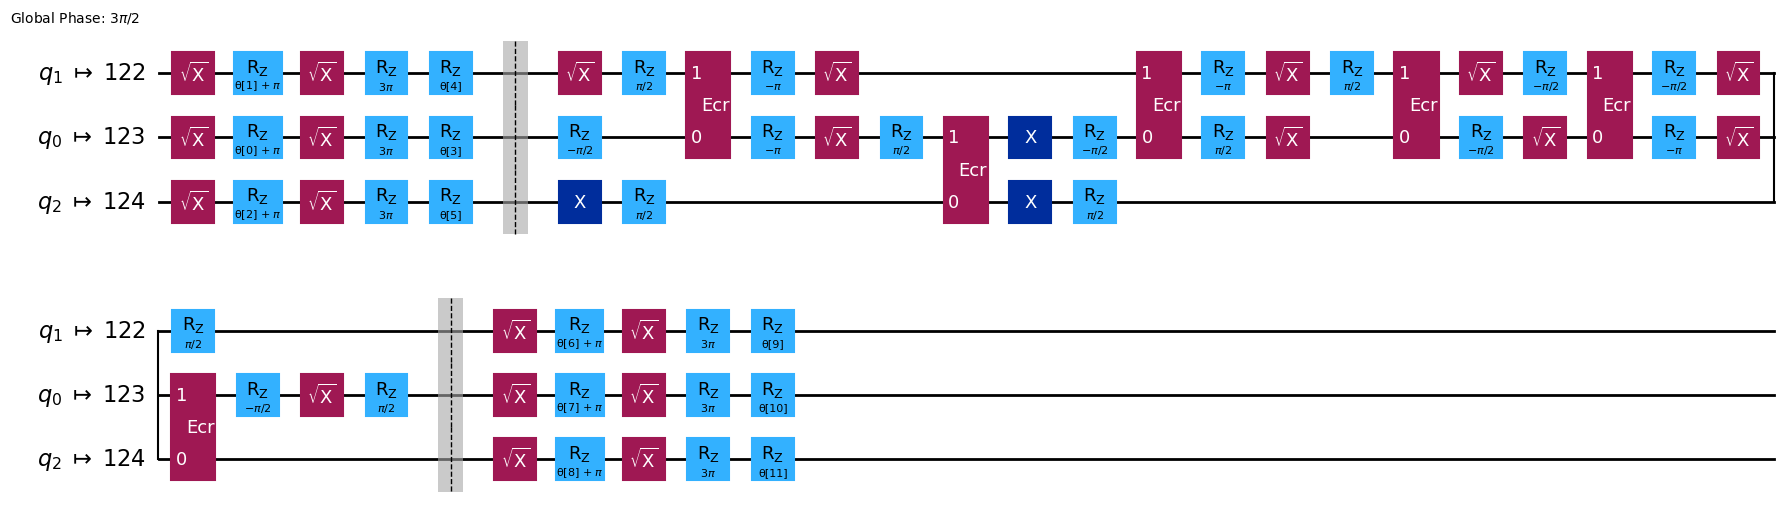

In [20]:
isa_circuit.draw('mpl', idle_wires=False,)

Despu√©s de la transpilaci√≥n, el circuito solo contiene las puertas b√°sicas nativas del backend. Para obtener m√°s detalles sobre los circuitos ISA, consulte estos recursos del equipo de IBM:

- [What are ISA circuits?](https://www.ibm.com/quantum/blog/isa-circuits)
- [Understanding the new ISA circuits requirement](https://docs.quantum.ibm.com/announcements/news/2024-05-06-ISA-circuit-requirement#understanding-the-new-isa-circuits-requirement)

A continuaci√≥n ejecut√© el siguiente c√≥digo para definir nuestro hamiltoniano y luego pasar al Ejercicio 6.

In [21]:
# Defina nuestro Hamiltoniano
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [22]:
import qiskit
qiskit.__version__

'1.0.2'

<div class="alert alert-block alert-info">
    
<b>Consejo: ¬°Para los dos ejercicios siguientes, aseg√∫rese de estar trabajando con Qiskit 1.0.2! </b>

Puede descargar esta versi√≥n usando: **%pip install qiskit==1.0.2**

    
</div>

<a id="exercise5"></a>
<a name="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 6: Definiendo la funci√≥n de costes </b> 
    
Como muchos problemas de optimizaci√≥n cl√°sicos, la soluci√≥n a un problema VQE se puede formular como la minimizaci√≥n de una funci√≥n de coste. La funci√≥n de coste de nuestro VQE es simple: ¬°la energ√≠a!

**Su tarea:** Defina una funci√≥n de coste utilizando Qiskit Runtime Estimator para encontrar la energ√≠a para un estado parametrizado determinado y nuestro hamiltoniano.

</div>

In [23]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Devuelva la estimaci√≥n de energ√≠a del estimador

    Par√°metros:
        params (ndarray): matriz de par√°metros ansatz
        ansatz (QuantumCircuit): circuito ansatz parametrizado
        hamiltoniano (SparsePauliOp): representaci√≥n del operador del hamiltoniano
        estimador (EstimatorV2): instancia primitiva del estimador

    Devoluciones:
        float: estimaci√≥n de energ√≠a
    """
    pub = estimator.run([(ansatz, hamiltonian, params)])
    result = pub.result()#A√±ada su c√≥digo aqu√≠
    energy = result[0].data.evs #A√±ada su c√≥digo aqu√≠
    print(result[0].metadata)

    callback_dict["iters"] += 1 #Add your code
    callback_dict["prev_vector"] = result[0].metadata #Add your code
    callback_dict["cost_history"].append(energy) #Add your code

    

    

### No cambie el programa m√°s all√° de esta l√≠nea ###
    print(energy)
    return energy, result

In [24]:
# Env√≠e su respuesta usando el siguiente c√≥digo
grade_lab1_ex6(cost_func) # Tipo de resultado esperado:

{'target_precision': 0.015625}
[0.65429688]
Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


Las funciones callback son una forma est√°ndar para obtener informaci√≥n adicional sobre el estado de un algoritmo iterativo (como VQE). Sin embargo, es posible hacer mucho m√°s que esto. Aqu√≠, usamos un objeto mutable (diccionario) para almacenar el vector resultante en cada iteraci√≥n de nuestro algoritmo, en caso de que necesitemos reiniciar la rutina debido a un fallo o devolver el n√∫mero de otra iteraci√≥n.

In [25]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

### Usando el optimizador cl√°sico

Ahora podemos usar un optimizador cl√°sico de nuestra elecci√≥n para minimizar la funci√≥n de coste.
En el hardware cu√°ntico real, la elecci√≥n del optimizador es importante, ya que no todos los optimizadores manejan igualmente bien los entornos ruidosos de funciones de coste. Aqu√≠ podemos usar rutinas SciPy.

Para empezar, especificamos un conjunto inicial aleatorio de par√°metros:

In [26]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.06916889, 4.81336319, 6.11137087, 0.87576668, 5.16318637,
       4.46573849, 6.24954838, 1.87318338, 3.50810724, 3.05491853,
       1.39644232, 3.82434719])

<a id="exercise7"></a>
<a name="exercise7"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 7: QiskitRuntimeService V2 primitivas, modo de testeo local y sesiones, una primera vista </b> 
    

A continuaci√≥n, utilizaremos el nuevo QiskitRuntimeService [primitivas V2](https://docs.quantum.ibm.com/api/migration-guides/v2-primitives): [EstimatorV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.EstimatorV2) y [SamplerV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.SamplerV2).

La nueva interfaz del **Estimator** nos permite especificar un √∫nico circuito, m√∫ltiples observables y conjuntos de par√°metros para ese circuito, de modo que se puedan especificar de manera eficaz barridos sobre conjuntos de valores de par√°metros y observables. Anteriormente, ten√≠amos que especificar el mismo circuito varias veces para que coincidiera con el tama√±o de los datos que se iban a combinar. Adem√°s, si bien a√∫n puede usar optimizaci√≥n_level y resilience_level como controles simples, las primitivas V2 brindan una mayor flexibilidad para activar o desactivar m√©todos individuales de mitigaci√≥n/supresi√≥n de errores, as√≠ permitiendo personalizaciones seg√∫n sus necesidades.

**SamplerV2** es ahora m√°s simple, centr√°ndose en su tarea principal de muestrear el registro cu√°ntico a partir de la ejecuci√≥n de circuitos cu√°nticos. SamplerV2 devuelve las muestras, cuyo tipo est√° definido por el programa, sin pesos. Los datos de salida tambi√©n est√°n separados por los nombres de los registros de salida definidos por el programa. Este cambio permite el soporte futuro para circuitos con flujo de control cl√°sico.

Tambi√©n utilizaremos el [modo de prueba local de Qiskit 1.0](https://docs.quantum.ibm.com/verify/local-testing-mode). El modo de prueba local (disponible con qiskit-ibm-runtime 0.22.0 o posterior) se puede utilizar para ayudar a desarrollar y probar programas antes de ajustarlos y enviarlos a hardware cu√°ntico real.

**Su tarea:** Despu√©s de usar el modo de prueba local para verificar su programa, todo lo que necesita hacer es cambiar el nombre del backend para ejecutarlo en un sistema IBM Quantum.

</div>

In [27]:
### Seleccione un backend
## Utilice FakeSherbrooke para simular con un ruido que se acerque m√°s al experimento real. Esto ser√° m√°s lento.
## Utilice AerSimulator para simular sin ruido y realizar iteraciones r√°pidamente. Esto ser√° m√°s r√°pido.
from qiskit_ibm_runtime import QiskitRuntimeService
backend = FakeSherbrooke()




### No cambie el programa m√°s all√° de esta l√≠nea ###

# Aqu√≠ hemos actualizado la funci√≥n de coste para obtener solo la energ√≠a compatible con las versiones recientes de scipy (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})

{'target_precision': 0.015625}
0.01806640625
{'target_precision': 0.015625}
-0.7412109375
{'target_precision': 0.015625}
-0.86474609375
{'target_precision': 0.015625}
-0.28369140625
{'target_precision': 0.015625}
-0.64013671875
{'target_precision': 0.015625}
-0.892578125
{'target_precision': 0.015625}
-0.99853515625
{'target_precision': 0.015625}
-1.60009765625
{'target_precision': 0.015625}
-2.25244140625
{'target_precision': 0.015625}
-1.66650390625
{'target_precision': 0.015625}
-2.14697265625
{'target_precision': 0.015625}
-2.22314453125
{'target_precision': 0.015625}
-2.19677734375
{'target_precision': 0.015625}
-2.78369140625
{'target_precision': 0.015625}
-1.89892578125
{'target_precision': 0.015625}
-3.3857421875
{'target_precision': 0.015625}
-3.2275390625
{'target_precision': 0.015625}
-3.4052734375
{'target_precision': 0.015625}
-2.80712890625
{'target_precision': 0.015625}
-3.380859375
{'target_precision': 0.015625}
-3.3154296875
{'target_precision': 0.015625}
-3.322265625


In [28]:
# Env√≠e su respuesta usando el siguiente c√≥digo

grade_lab1_ex7(res) # Tipo de resultado esperado: OptimizeReSult

Submitting your answer. Please wait...


Congratulations üéâ! Your answer is correct and has been submitted.


<div class="alert alert-block alert-info">
    
<b>Consejo: aumente `maxiter` si no ve convergencia </b>

Si el coste no converge, aumente el `maxiter` (100 es un n√∫mero apropiado) y ejecute el Ejemplo 7 de nuevo.
    
</div>

Veamos nuestros resultados:

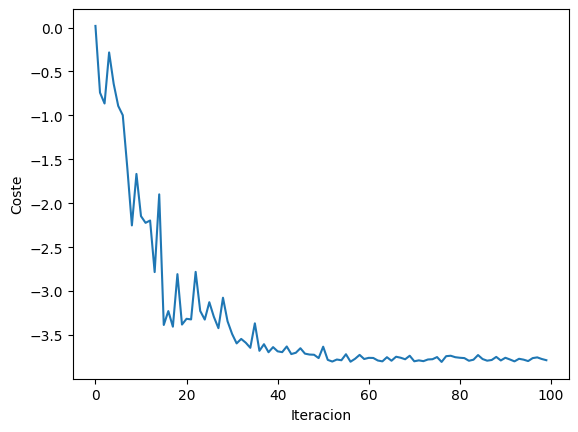

In [29]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Iteracion")
plt.ylabel("Coste")
plt.draw()

üéâ Como era de esperar, nuestro algoritmo VQE minimiz√≥ la energ√≠a a lo largo de las iteraciones, hasta alcanzar el estado fundamental. ¬°Ahora hemos implementado con √©xito un algoritmo VQE utilizando las nuevas funcionalidades Qiskit 1.0!

¬°Gracias por completar este laboratorio y buena suerte con los siguientes!

# Informaci√≥n adicional

**Creado por:** James Weaver, Mar√≠a Gragera Garc√©s

**Supervisado por:** Junye Huang

**Traducido por:** Mar√≠a Gragera Garc√©s

**Versi√≥n:** 1.3.0